# Loan Approval Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:

loans=pd.read_csv('D:\HH DATA SCIENCE\loan_borrower_data.csv')
print (loans.shape)
loans.iloc[80:89]

(9578, 14)


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
80,1,all_other,0.0775,93.67,11.736069,2.14,762,8370.000000,21050,1.0,0,0,0,0
81,1,all_other,0.0775,93.67,10.819778,5.35,762,8370.000000,21050,0.7,0,0,0,0
82,1,all_other,0.0870,88.65,11.695247,15.00,742,3026.000000,8155,14.9,1,0,0,0
83,1,all_other,0.0964,128.41,11.512925,15.00,722,3026.000000,8155,14.9,1,0,0,0
84,1,all_other,0.0870,94.98,11.034890,12.23,737,2729.958333,3678,30.7,0,0,0,0
85,1,debt_consolidation,0.1217,179.80,10.463103,7.10,662,2944.000000,2040,36.2,2,0,0,0
86,1,all_other,0.1533,444.05,11.002100,19.52,667,2700.958333,33074,68.8,2,0,0,0
87,1,all_other,0.0775,124.89,11.031659,3.46,747,2519.000000,1918,17.1,0,0,0,0
88,1,all_other,0.1533,644.30,11.407565,5.24,662,1770.000000,22379,62.2,0,0,0,0


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
loans.purpose.unique()

array(['debt_consolidation', 'all_other', 'small_business', 'educational'],
      dtype=object)

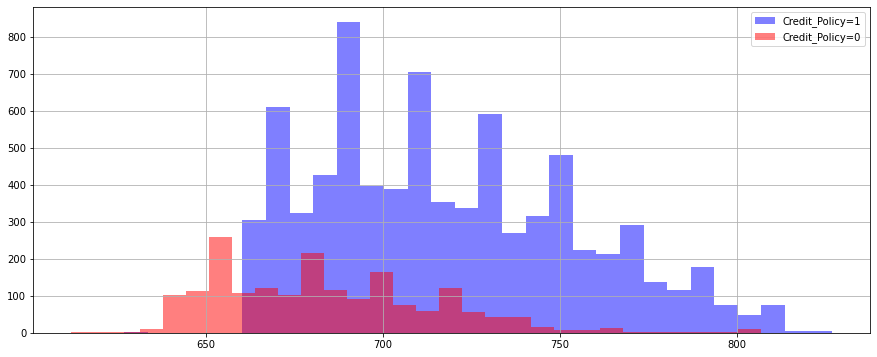

In [8]:
plt.figure(figsize=(15,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit_Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit_Policy=0')
plt.legend()
plt.show()

#shows that higher fico score is better 

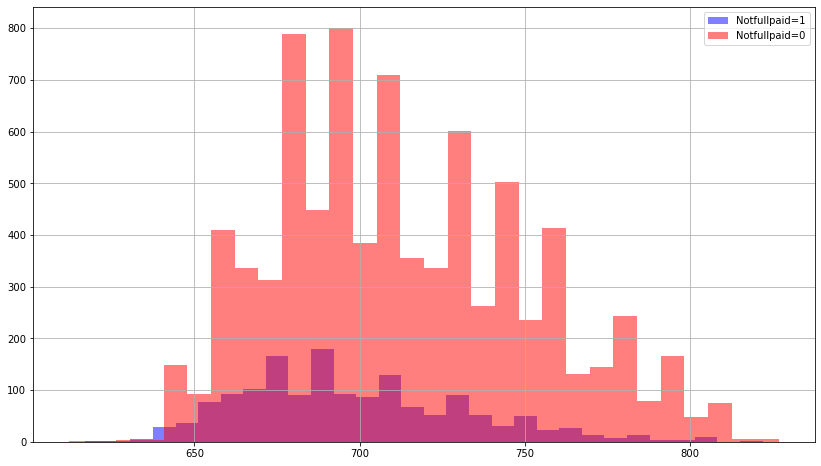

In [9]:
plt.figure(figsize=(14,8))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Notfullpaid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Notfullpaid=0')
plt.legend()
plt.show()
#hence fico score is a clear indication that they paid back the loan

<AxesSubplot:xlabel='purpose', ylabel='count'>

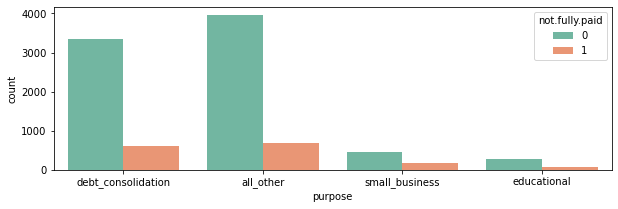

In [12]:
plt.figure(figsize=(10,3))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set2')
#hence debt consolidation is the risky option for the bank

In [14]:
cat_feats=['purpose'] #get dummies takes each of the categories into a column and then mark it as 0 or 1
final_data=pd.get_dummies(loans,columns=cat_feats,drop_first=True)
final_data.iloc[70:79]

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_debt_consolidation,purpose_educational,purpose_small_business
70,1,0.0743,155.38,11.156251,4.56,812,9809.000000,813,1.0,0,0,0,0,0,0,0
71,1,0.0807,235.25,11.918391,2.72,757,5202.000000,23678,24.4,4,0,0,0,0,0,0
72,1,0.0996,257.99,10.778956,15.13,722,2640.000000,11289,47.8,3,0,0,0,1,0,0
73,1,0.1501,225.37,12.269047,6.45,677,6240.000000,56411,75.3,0,0,0,1,0,0,1
74,1,0.0964,80.26,11.225243,20.00,772,4920.958333,269,3.8,3,0,0,1,0,0,0
75,1,0.1280,84.00,10.373491,20.00,682,5492.000000,3408,35.1,1,0,0,1,0,0,0
76,1,0.1122,507.46,10.596635,13.50,712,5368.958333,6513,34.3,3,0,1,1,1,0,0
77,1,0.0743,124.31,10.596635,3.45,772,1739.958333,330,11.0,0,0,0,0,0,1,0
78,1,0.0870,63.32,11.156251,6.07,712,2550.000000,5967,19.8,1,0,0,0,0,0,0


In [16]:
X=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']
# train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=51)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(6704, 15)
(6704,)
(2874,)


## Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)


DecisionTreeClassifier()

In [21]:
y_pred=dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


print (classification_report(y_test,y_pred))
print (confusion_matrix(y_test,y_pred))
accuracy_score(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2416
           1       0.21      0.24      0.22       458

    accuracy                           0.74      2874
   macro avg       0.53      0.54      0.53      2874
weighted avg       0.75      0.74      0.74      2874

[[2017  399]
 [ 350  108]]


0.7393876130828114

In [22]:
(2017+108)/(2017+399+350+108)

0.7393876130828114

## Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=600) #600 decision trees

rfc.fit(X_train,y_train)

y_pred_rfc=rfc.predict(X_test)
print(y_pred_rfc.shape)
from sklearn.metrics import classification_report ,confusion_matrix,accuracy_score
print (confusion_matrix(y_test,y_pred_rfc))
print (classification_report(y_test,y_pred_rfc))
accuracy_score(y_test,y_pred_rfc)
#random forest is more accurate than decision tree

In [24]:
x_new=X.tail(1) #last record
#print (x_new)
print (type(x_new))
x_new["installment"]=1000
print (x_new)

<class 'pandas.core.frame.DataFrame'>
      credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
9577              0    0.1392         1000       11.264464  16.28   732   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
9577             4740.0      37879        57.0               6            0   

      pub.rec  purpose_debt_consolidation  purpose_educational  \
9577        0                           1                    0   

      purpose_small_business  
9577                       0  


C:\Users\akhil\AppData\Local\Temp/ipykernel_24472/202787718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_new["installment"]=1000


In [25]:

x_new["installment"]=600
rfc.predict(x_new)

C:\Users\akhil\AppData\Local\Temp/ipykernel_24472/883886492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_new["installment"]=600


array([0], dtype=int64)